## Observations and Insights 

### 1) Effectiveness of Treatments for Survival
> Examining the bar charts for the number of mice for all treatment regimens, it can be seen that the two most effective treatments are Ramicane and Capomulin.  In terms of the survival of the mice, these two regimens consistently have higher numbers of surviving mice than the other treatments.  This trend continues over all the timepoints, with these two treatments having the highest numbers of mice surviving.  This is in contrast to a treatment regimen such as Propriva, which has a high number of mice for the first three points of 5, 10 and 15 days, but declines markedly at the timepoint of 20 days and keeps decreasing over all the remaining timepoints.  It has the least number of living mice by the last timepoint of 45 days.  This would suggest that the Ramicane and Capomulin treatments should be experimented with further, and that Propriva may be not be a useful treatment.  The caveat to this is that this was a small study of 248 mice in total, with 25 mice or less assigned to each regimen.  A much larger study providing much more data would be required to draw more definitive conclusions.  

### 2) Treatments and Final Tumour Volumes
> The boxplots for the final tumour volumes for the four treatment regimens of Capomulin, Ramicane, Infubinol and Ceftamin display further interesting observations on the effectiveness of the four treatments.  In these boxplots, it can again be seen that the regimens of Capomulin and Ramicane result in significantly lower final tumour volumes than the Infubinol and Ceftamin treatments.  This is shown by the upper and lower quartiles, median and mean values of these treatments.  There is also less variability in the final tumour volumes of these treatments as demonstrated by the interquartile range, and upper and lower bounds versus the Infubinol and Ceftamin regimens.  This suggests that Capomulin and Ramicane are consistently more efficacious in reducing tumour volumes than the other two drugs.  Infubinol and Ceftamin have substantially higher final tumour volumes as seen in their upper and lower quartiles, median and mean values.  There is also a greater spread of values as seen in the interquartile range and the upper and lower bounds for outliers for each treatment.  The only possible outlier identified for the four regimens was for Infubinol, again suggesting a wide variability of the data points.  

### 3) Correlation and Regression between Mouse Weight and Average Tumour Volume
> The listed mice weights have been correlated with the average tumour volume for the Capomulin regimen.  The mouse weights are provided with the mouse metadata, and do not change over the timepoints, making these an independent variable.  The calculated correlation coefficient for the two variables is 0.95, which suggest a strong positive correlation.  This is also displayed in the scatter plot of mouse weight versus average tumour volume, where as the mouse weight increases, so too does the average tumour volume.  Thus, the linear regression equation derived from the data should be able to accurately predict average tumour volume given the weight of the mouse.  Plotting the equation of this line on the same plot as the scatter plot displays that the predicted values are close to the observed values and for two data points, the linear equation directly intersects with the observed data points.  However, this correlation is only for the Capomulin regimen and only consists of a set of 25 mice.  It would need further analysis to see if this strongly positive correlation holds true for other treatment regimens.


In [850]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from IPython.display import display

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_full = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

# Display the data table for preview
mouse_full.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [851]:
# Checking the number of mice
# First look for and drop any duplicates in metadata as a precaution
mouse_metadata_dd = mouse_metadata.drop_duplicates()

# Finding all unique Mouse IDs gives the number of mice
num_mice = mouse_metadata_dd["Mouse ID"].nunique()

# Display the current number of mice
print(f"Number of mice = {num_mice}")


Number of mice = 249


In [852]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_rows_mouseID_timepoint = mouse_full[mouse_full.duplicated(["Mouse ID", "Timepoint"], keep=False)]

# Display the duplicated timepoint data
duplicate_rows_mouseID_timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [853]:
# Optional: Get all the data for the duplicate mouse ID
# The only Mouse ID with repeated timepoint data is g989
# Use loc to display this data from the full DataFrame
mouse_full.loc[mouse_full["Mouse ID"] == "g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [818]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
# In this case, all the data apart from that associated with Mouse ID g989
# can be in the clean DataFrame
mouse_full_clean = mouse_full[mouse_full["Mouse ID"] != "g989"]


In [854]:
# Checking the number of mice in the clean DataFrame
# Finding all unique Mouse IDs after cleaning gives the number of mice
num_mice = mouse_full_clean["Mouse ID"].nunique()

# Display the number of mice after data cleaning
print(f"Number of mice after data cleaning = {num_mice}")


Number of mice after data cleaning = 248


## Summary Statistics

In [855]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Create a list of all the drug regimens after searching the DataFrame for unique values in that column
drug_regimens = mouse_full_clean["Drug Regimen"].unique()

# Create a DataFrame to hold the summary statistics for each drug regimen
summary_drugs_volume = pd.DataFrame(columns=["Drug Regimen","Mean","Median","Variance","Std Dev","SEM"])

# Loop through all the drug regimens
for drug in drug_regimens:
    
    # Retrieve the subset of data associated with the current drug regimen from the loop
    # As only calculating statistics for the tumour volume, only need that column
    drug_subset = mouse_full_clean.loc[mouse_full_clean["Drug Regimen"] == drug, ["Tumor Volume (mm3)"]]
    
    # Calculate the mean of the tumour volume from the subset of data
    drug_mean = drug_subset["Tumor Volume (mm3)"].mean()
    
    # Calculate the median of the tumour volume from the subset of data
    drug_median = drug_subset["Tumor Volume (mm3)"].median()
    
    # Calculate the variance of the tumour volume from the subset of data
    drug_variance = drug_subset["Tumor Volume (mm3)"].var()
    
    # Calculate the standard deviation of the tumour volume from the subset of data
    drug_stddev = drug_subset["Tumor Volume (mm3)"].std()
    
    # Calculate the SEM (standard error measure) of the tumour volume from the subset of data
    drug_sem = drug_subset["Tumor Volume (mm3)"].sem()
    
    # Create a DataFrame containing the calculated statistical data and the name of the drug regimen
    subset_drugs_volume = pd.DataFrame(data=[[drug,drug_mean,drug_median,drug_variance,drug_stddev,drug_sem]],columns=["Drug Regimen","Mean","Median","Variance","Std Dev","SEM"])                     
    
    # Concatenate the subset's DataFrame to the summary DataFrame
    summary_drugs_volume = pd.concat([summary_drugs_volume, subset_drugs_volume], ignore_index=True)
    
# Format the summary statistics to be displayed with two decimal points using the map function
summary_drugs_volume["Mean"] = summary_drugs_volume["Mean"].map("{:,.2f}".format)
summary_drugs_volume["Median"] = summary_drugs_volume["Median"].map("{:,.2f}".format)
summary_drugs_volume["Variance"] = summary_drugs_volume["Variance"].map("{:,.2f}".format)
summary_drugs_volume["Std Dev"] = summary_drugs_volume["Std Dev"].map("{:,.2f}".format)
summary_drugs_volume["SEM"] = summary_drugs_volume["SEM"].map("{:,.2f}".format)

# Print out heading and dividing line for summary statistics DataFrame
print("\nSummary Statistics of the Tumour Volume for Each Drug Regimen")
print("---------------------------------------------------------------")

# Can use drug regimen in this case for the index, giving a tidier output table
summary_drugs_volume.set_index("Drug Regimen", inplace=True)

# Display the summary statistics DataFrame
summary_drugs_volume



Summary Statistics of the Tumour Volume for Each Drug Regimen
---------------------------------------------------------------


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Ramicane,40.22,40.67,23.49,4.85,0.32
Capomulin,40.68,41.56,24.95,4.99,0.33
Infubinol,52.88,51.82,43.13,6.57,0.49
Placebo,54.03,52.29,61.17,7.82,0.58
Ceftamin,52.59,51.78,39.29,6.27,0.47
Stelasyn,54.23,52.43,59.45,7.71,0.57
Zoniferol,53.24,51.82,48.53,6.97,0.52
Ketapril,55.24,53.70,68.55,8.28,0.60
Propriva,52.32,50.45,43.85,6.62,0.54


In [847]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

# Use groupby function on Drug Regimen and the column Tumor Volume to generate statistics
# Using agg allows statistical functions to be calculated all in one command
# Use sort=False in groupby function to avoid drug regimens being sorted alphabetically
# Using Std_Dev for standard deviation as cannot have spaces in name
summary_stats = mouse_full_clean.groupby(["Drug Regimen"], sort=False)["Tumor Volume (mm3)"].agg(
                                                                                    Mean = 'mean',
                                                                                    Median = 'median',
                                                                                    Variance = 'var',
                                                                                    Std_Dev = 'std',
                                                                                    SEM = 'sem')
# Rename the standard deviation column to match column from previous DataFrame
summary_stats_final = summary_stats.rename(columns = {"Std_Dev" : "Std Dev"})

# Format the summary statistics to be displayed with two decimal points using the map fumction
summary_stats_final["Mean"] = summary_stats_final["Mean"].map("{:,.2f}".format)
summary_stats_final["Median"] = summary_stats_final["Median"].map("{:,.2f}".format)
summary_stats_final["Variance"] = summary_stats_final["Variance"].map("{:,.2f}".format)
summary_stats_final["Std Dev"] = summary_stats_final["Std Dev"].map("{:,.2f}".format)
summary_stats_final["SEM"] = summary_stats_final["SEM"].map("{:,.2f}".format)

# Print out heading and dividing line for summary statistics DataFrame
print("\nSummary Statistics of the Tumour Volume for Each Drug Regimen")
print("---------------------------------------------------------------")

# Display the summary statistics DataFrame
summary_stats_final



Summary Statistics of the Tumour Volume for Each Drug Regimen
---------------------------------------------------------------


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Ramicane,40.22,40.67,23.49,4.85,0.32
Capomulin,40.68,41.56,24.95,4.99,0.33
Infubinol,52.88,51.82,43.13,6.57,0.49
Placebo,54.03,52.29,61.17,7.82,0.58
Ceftamin,52.59,51.78,39.29,6.27,0.47
Stelasyn,54.23,52.43,59.45,7.71,0.57
Zoniferol,53.24,51.82,48.53,6.97,0.52
Ketapril,55.24,53.70,68.55,8.28,0.60
Propriva,52.32,50.45,43.85,6.62,0.54


## Bar and Pie Charts

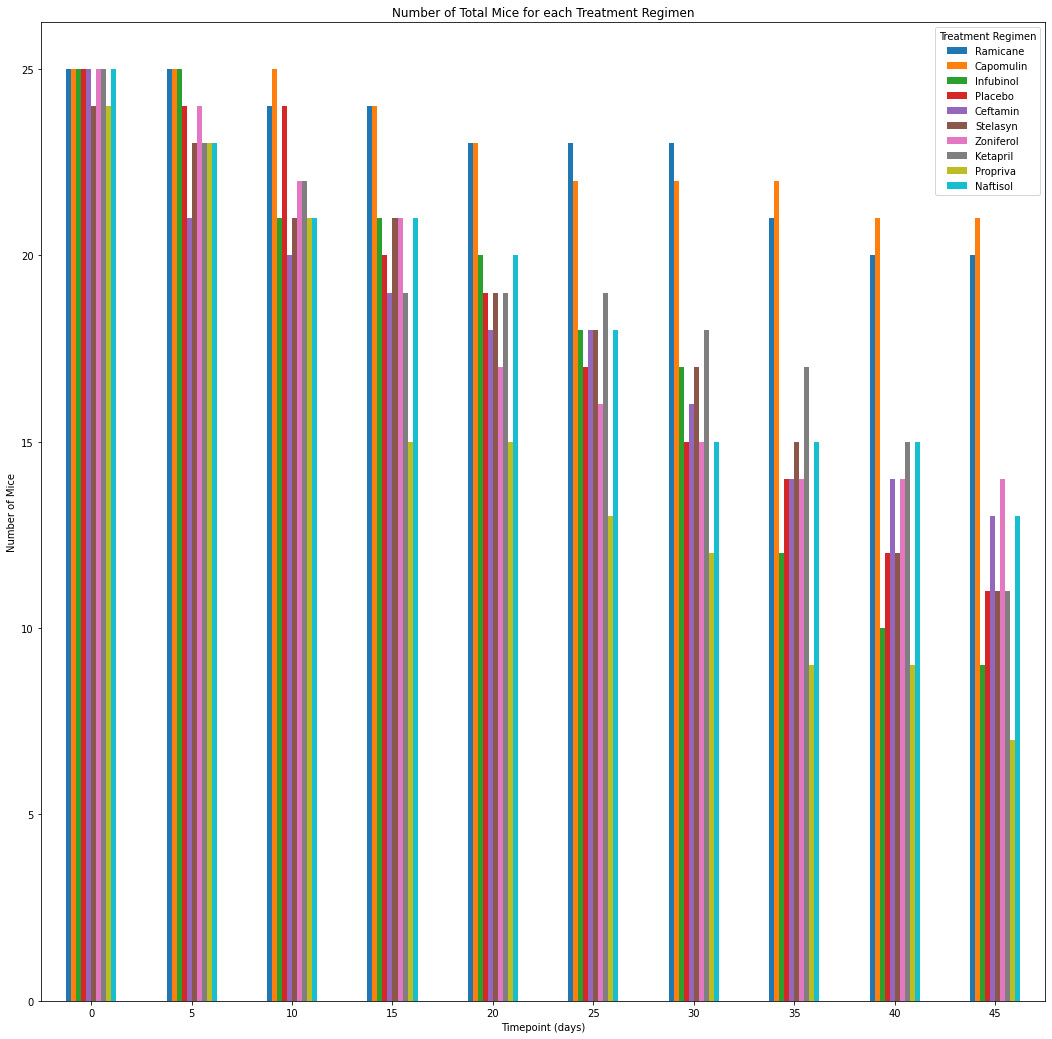

In [856]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Timepoints are 0,5,10,15,20,25,30,35,45 inclusive
# Drug Regimens are Ramicane, Capomulin, Infubinol, Placebo, Ceftamin, Stelasyn, Zoniferol, Ketapril, Propiva, Naftisol

# Find the number of mice for each drug regimen at each of the different timepoints
# Size of the Mouse IDs is a count of the number of mice
num_mice_regimen = mouse_full_clean.groupby(["Drug Regimen", "Timepoint"], sort=False)["Mouse ID"].size()

# Create a summary DataFrame with the number of mice at each timepoint for each drug regimen
num_mice_summary = pd.DataFrame( {
                            "Ramicane" : num_mice_regimen["Ramicane"], 
                            "Capomulin" : num_mice_regimen["Capomulin"], 
                            "Infubinol" : num_mice_regimen["Infubinol"],
                            "Placebo" : num_mice_regimen["Placebo"],
                            "Ceftamin" : num_mice_regimen["Ceftamin"],
                            "Stelasyn" : num_mice_regimen["Stelasyn"],
                            "Zoniferol" : num_mice_regimen["Zoniferol"],
                            "Ketapril" : num_mice_regimen["Ketapril"],
                            "Propriva" : num_mice_regimen["Propriva"],
                            "Naftisol" : num_mice_regimen["Naftisol"]
                            },
                           )
# Start plotting section
%matplotlib inline

# Plot bar plot of DataFrame using plot function, specifying size of figure, rotation of x-axis labels
# Title of plot, x and y-axis labels also set 
ax = num_mice_summary.plot(kind="bar", figsize=(18,18), rot=0, width=0.5, title="Number of Total Mice for each Treatment Regimen", xlabel="Timepoint (days)", ylabel="Number of Mice");

# Set heading for legend
plt.legend(title="Treatment Regimen")

# The pass command and semicolon suppresses other text output
pass;


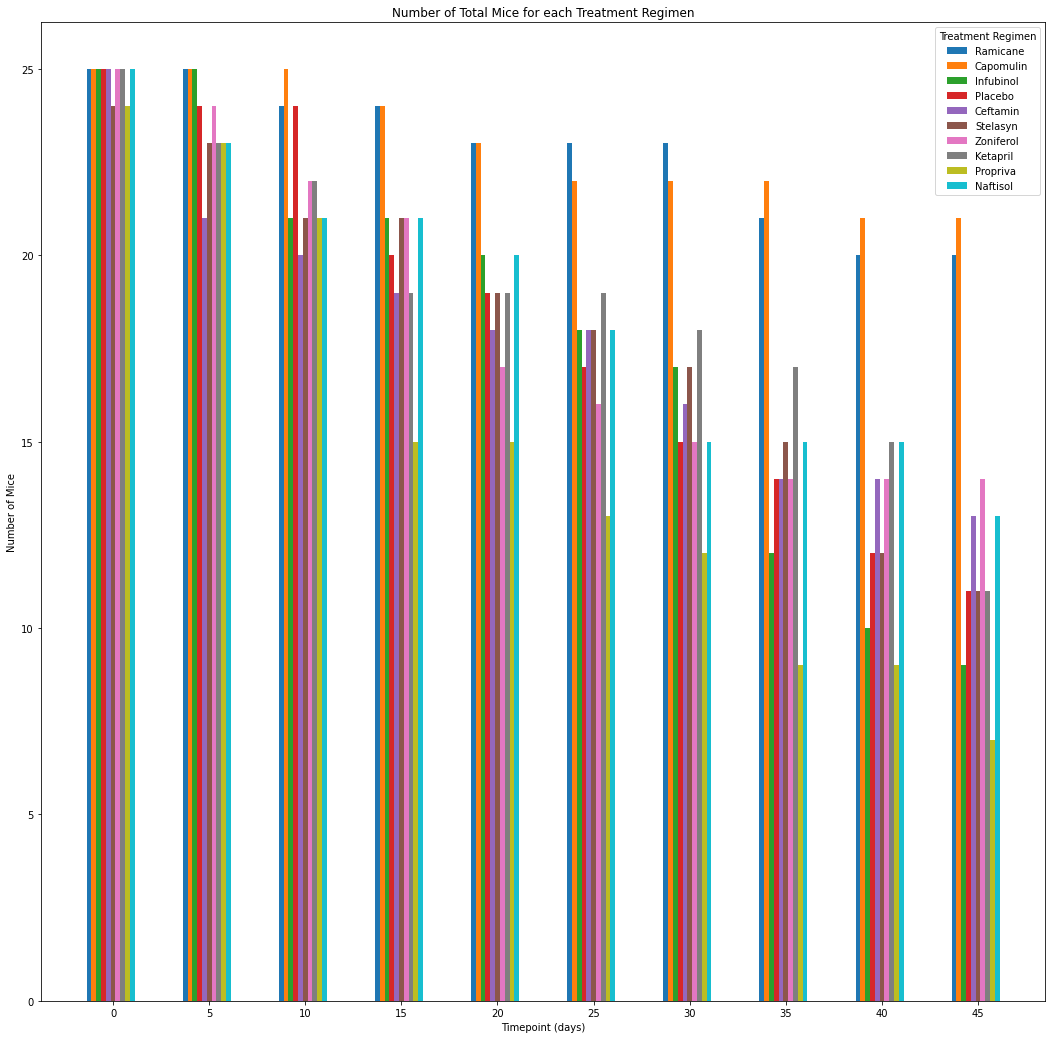

In [857]:
# Start plotting section
%matplotlib inline

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Set up plot with same size as previous bar chart
fig, ax = plt.subplots(figsize=(18, 18))

# Generate a list of the timepoints using NumPy arange from 0 to 50 at intervals of 5
timepoint = np.arange(0,50,5)

# Set the width of the bars
bar_width = 0.25

# Set offsets so that the bars are next to each other and match the previous bar chart
offset = [-1.25,-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]

# Loop through all ten drug regimens
for i in range(0,10):
    
    # Extract the data for the current drug regimen being plotted using its numerical index of i
    # from the DataFrame created in the last section
    data = num_mice_summary.iloc[:,[i]]
    
    # Plot bar chart with correct offset indexed by i using previously created DataFrame listing drug regimens
    plt.bar(timepoint+offset[i], data[drug_regimens[i]], width=bar_width)
    
# Set the x-axis with ticks at every timepoint
ax.set_xticks(timepoint)

# Set the title of the plot
ax.set_title("Number of Total Mice for each Treatment Regimen")

# Set the x-axis label of Timepoint (days)
ax.set_xlabel("Timepoint (days)")

# Set the y-axis label of Number of Mice
ax.set_ylabel("Number of Mice")

# Set heading for legend
plt.legend(title="Treatment Regimen", labels = drug_regimens)

# The pass command and semicolon suppresses other text output
pass;


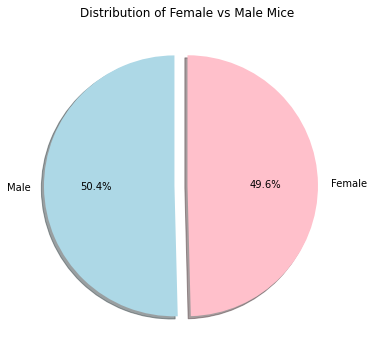

In [858]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Use groupby function to find number of mice grouped by sex
# Counting of unique Mouse IDs generates number of mice
num_mice_sex = mouse_full_clean.groupby(["Sex"], sort=False)["Mouse ID"].nunique()

# Create DataFrame containing number of mice by sex
num_mice_sex_mf = pd.DataFrame({
                                    "Number of Mice" : num_mice_sex 
                               },)

# Calulate the percentage of mice for each sex by dividing the amount in each sex by the previous num_mice
# Multiply this by 100 to convert to a percentage and round to 1 decimal place
# Percentage seems better to display the distribution of mice
# Name column Percentage of Mice
num_mice_sex_mf["Percentage of Mice"] = round(((num_mice_sex_mf["Number of Mice"] / num_mice) * 100),1)

# Set colours for graph
# Blue for male, pink for female
# Seems obvious! (although stereotypical)
colors = ["lightblue","pink"]

# Set explode to separate the pie pieces
explode = (0.1,0)

# Plot pie plot of DataFrame of number of mice for each sex using plot function
# Specifying size of figure, explosion of pie graph, colours, turn on shadow and give 90 degree angle to start plot
# Remove y-axis label as is not necessary
# Display distribution as percentage with one decimal place
# Title of plot also set
ax = num_mice_sex_mf["Number of Mice"].plot(kind="pie", figsize=(6,6), explode=explode, colors=colors, shadow=True, startangle=90, title="Distribution of Female vs Male Mice", ylabel='', autopct = "%1.1f%%" );


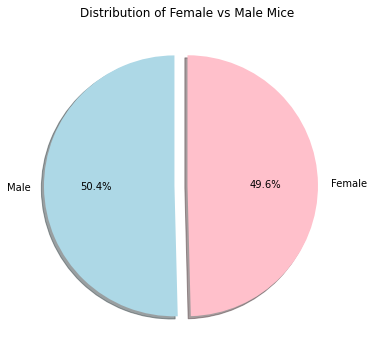

In [859]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
%matplotlib inline

# Set up plot with same size as previous pie plot
fig4, ax4 = plt.subplots(figsize=(6,6))

# Set up labels for both sexes of mice
mice_labels = ["Male", "Female"]

# Extract th number of mice for each sex from DataFrame created in previous section into a list
# 0 index for male mice, 1 index for female mice
num_mice_mf = [num_mice_sex_mf["Number of Mice"][0], num_mice_sex_mf["Number of Mice"][1]]

# Set colours for graph
# Blue for male, pink for female
# Seems obvious! (although stereotypical)
colors = ["lightblue","pink"]

# Set explode to separate the pie pieces
explode = (0.1,0)

# Tell matplotlib to create a pie chart based upon the above data
# Use explode, labels, colors as set previously
# Turn on shadow and 90 degree angle to start plot
# Display distribution as percentage with one decimal place
plt.pie(num_mice_mf, explode=explode, labels=mice_labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

# Set the title of the pie plot
ax4.set_title("Distribution of Female vs Male Mice")

# Display the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [860]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Use groupby function to find data of Mouse IDs at their maximum timepoint
mouse_max_tp = mouse_full_clean.groupby(["Mouse ID"], sort=False)["Timepoint"].max()

# Place the data into a DataFrame
mouse_max_timepoint = pd.DataFrame({ 
                                        "Max Timepoint" : mouse_max_tp
                                   })

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Need to do an inner merge on the Mouse ID
mouse_merge_maxtp = pd.merge(mouse_full_clean, mouse_max_timepoint, how="inner", on="Mouse ID")

# Select only the data at the maximum timepoint for each Mouse ID
mouse_regimen_volume = mouse_merge_maxtp.loc[mouse_merge_maxtp["Timepoint"] == mouse_merge_maxtp["Max Timepoint"], ["Mouse ID", "Drug Regimen", "Sex", "Age_months","Weight (g)", "Timepoint","Tumor Volume (mm3)", "Metastatic Sites"]]

# Display a preview of the merged and selected DataFrame
mouse_regimen_volume


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1846,z314,Stelasyn,Female,21,28,5,45.934712,0
1849,z435,Propriva,Female,12,26,10,48.710661,0
1859,z581,Infubinol,Female,24,25,45,62.754451,3
1869,z795,Naftisol,Female,13,29,45,65.741070,3


In [862]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_top4 = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty dictionary to fill with tumor volume data (for plotting)
# Key will be name of drug regimen
# Data will be list of values of tumour volumes for that drug regimen
# Using a dictionary for efficiency
tumor_volume_data = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Loop through each of the four drug regimens that have been selected 
for regimen in regimen_top4:
    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    tumor_subset = mouse_regimen_volume.loc[mouse_regimen_volume["Drug Regimen"] == regimen, ["Tumor Volume (mm3)"]]

    # Place tumour volume into a Series
    tumor_data_series = tumor_subset["Tumor Volume (mm3)"]
     
    # Convert series data into Python list
    data_list = tumor_data_series.to_list()
    
    # add subset
    # Add tumour volume data to dictionary with regimen as dictionary key
    tumor_volume_data[regimen] = data_list
    
# Convert tumour volume dictionary into DataFrame
tumor_volume_data_df = pd.DataFrame(tumor_volume_data)

# Create an empty DataFrame to store the quartiles, IQR, median and lower and upper bounds for outliers for each drug regimen
summary_volume_outliers = pd.DataFrame(columns=["Drug Regimen","Lower Quartile","Upper Quartile","IQR","Median","Lower Bound","Upper Bound"])

# Create an empty DataFrame to store all the data associated with any possible outliers
summary_outliers = pd.DataFrame(columns=["Mouse ID", "Drug Regimen", "Sex", "Age_months","Weight (g)", "Timepoint","Tumor Volume (mm3)", "Metastatic Sites"])

# Create an empty dictionary to hold any possible outliers
outliers_dict = {}

# Determine outliers using upper and lower bounds
for regimen in regimen_top4:
    
    
    # Calculate Q1, Q2 (median) and Q3 quartiles representing 25%, 50% and 75% of the data
    quartiles = tumor_volume_data_df[regimen].quantile([0.25,0.5,0.75])
    
    # Round the lower quartile (Q1) to two decimal places
    lowerq = round(quartiles[0.25],2)
    
     # Round the upper quartile (Q3) to two decimal places
    upperq = round(quartiles[0.75],2)
    
     # Round the median (Q2) to two decimal places
    median = round(quartiles[0.5], 2)
    
    # Calculate the IQR as in Q3-Q1 with full accuracy
    iqr_full = quartiles[0.75] - quartiles[0.25]
    
    # Round the IQR to two decimal places
    iqr = round((iqr_full),2)
    
    # Calculate the lower bound for possible outliers as Q1 - (1.5 * IQR)
    # Round to two decimal places
    lower_bound = round((quartiles[0.25] - (1.5*iqr_full)),2)
    
    # Calculate the upper bound for possible outliers as Q3 + (1.5 * IQR)
    # Round to two decimal places
    upper_bound = round((quartiles[0.75] + (1.5*iqr_full)),2)
    
    # Put the drug regimen and the newly calculated quantities into a DataFrame 
    subset_volume_outliers = pd.DataFrame(data=[[regimen,lowerq,upperq,iqr,median,lower_bound, upper_bound]], columns=["Drug Regimen","Lower Quartile","Upper Quartile","IQR","Median","Lower Bound","Upper Bound"])                     
    
    # Concatenate the new quantities for this drug regimen to the already existing DataFrame holding the other regimens
    summary_volume_outliers = pd.concat([summary_volume_outliers, subset_volume_outliers], ignore_index=True)
    

    # Check to see if any of the data points for this drug regimen are less than the lower bound or more than the upper bound
    # Store this data
    outlier_data = mouse_regimen_volume.loc[(mouse_regimen_volume["Drug Regimen"] == regimen) & ((mouse_regimen_volume["Tumor Volume (mm3)"] < lower_bound) | (mouse_regimen_volume["Tumor Volume (mm3)"] > upper_bound)), ["Mouse ID", "Drug Regimen", "Sex", "Age_months","Weight (g)", "Timepoint","Tumor Volume (mm3)", "Metastatic Sites"]]
    
    # Concatenate the outlier data to any already found outlier data
    summary_outliers = pd.concat([summary_outliers, outlier_data], ignore_index=True)
    

# Print out headings for the possible outlier data points
print("Possible Outliers in Final Tumor Data For Selected Drug Regimens\n")
print("Selected Drug Regimens -- Capomulin, Ramicane, Infubinol, Ceftamin")
print("--------------------------------------------------------------------\n")

# Display the DataFrame of all possible outliers
display(summary_outliers)

# Print out headings for the calculated quartiles, IQR, median, lower bound and upper bound
print("\n\nSummary Table of Quartiles, IQR, Median, Lower Bound, Upper Bound for Final Tumor Volume (mm3)\n")
print("----------------------------------------------------------------------------------------------\n")

# Display the DataFrame of summary quartiles, IQR, median, lower bound and upper bound for all four drug regimens
display(summary_volume_outliers)


Possible Outliers in Final Tumor Data For Selected Drug Regimens

Selected Drug Regimens -- Capomulin, Ramicane, Infubinol, Ceftamin
--------------------------------------------------------------------



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,c326,Infubinol,Female,18,25,5,36.321346,0




Summary Table of Quartiles, IQR, Median, Lower Bound, Upper Bound for Final Tumor Volume (mm3)

----------------------------------------------------------------------------------------------



,Drug Regimen,Lower Quartile,Upper Quartile,IQR,Median,Lower Bound,Upper Bound
0,Capomulin,32.38,40.16,7.78,38.13,20.70,51.83
1,Ramicane,31.56,40.66,9.10,36.56,17.91,54.31
2,Infubinol,54.05,65.53,11.48,60.17,36.83,82.74
3,Ceftamin,48.72,64.30,15.58,59.85,25.36,87.67


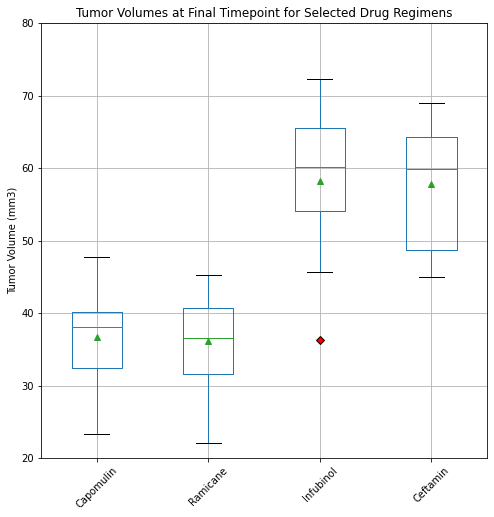

In [863]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Set up the figure for the box plot with its size
fig1, ax1 = plt.subplots(figsize=(8,8))

# Set the title for the boxplots
ax1.set_title('Tumor Volumes at Final Timepoint for Selected Drug Regimens')

# Set the label for the y-axis
ax1.set_ylabel('Tumor Volume (mm3)')

# Set the markers for outlier data to be a red diamond
red_diamond = dict(markerfacecolor='r', marker='D')

# Set the limits for the x-axis
ax1.set_ylim(20,80)

# Plot the boxplots for all the four drug regimens of interest 
# Capomulin, Ramicane, Infubinol, Ceftamin
# Rotate to the labels for each plot on the x-axis to be at 45 degrees
# Set the whiskers of the plots to be at +/- 1.5 IQR
# Show the mean for each regimen on the boxplot -- the green triangle
ax = tumor_volume_data_df.boxplot(column=regimen_top4, ax=ax1, rot=45, grid=True,  whis = 1.5, showmeans=True, flierprops=red_diamond)


## Line and Scatter Plots

,Tumor Volume (mm3)
Timepoint,
0,45.000000
5,45.473753
10,39.113891
15,39.776250
20,36.065835
25,36.617120
30,32.915292
35,30.206825
40,28.167397


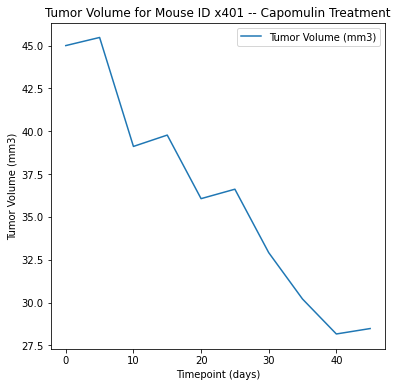

In [864]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Using Mouse ID = x401 a female mouse of age 16 months which weighs 15 grams

# Retrieve the data over all timepoints for this particular mouse
mouse_x401 = mouse_full_clean.loc[mouse_full_clean["Mouse ID"] == "x401"]

# Generate the list of timepoints with NumPy arange from 0 to 50 at intervals of 5
timepoint = np.arange(0,50,5)

# Retrieve the timepoint and tumour volume columns for this mouse into a DataFrame
mouse_x401_volume = mouse_x401[["Timepoint", "Tumor Volume (mm3)"]]

# Set the timepoints to be the index for the DataFrame
mouse_x401_volume.set_index("Timepoint", inplace=True)

# Display the data for the tumour volume over the timepoints for Mouse x401
display(mouse_x401_volume)

# Plot a line plot of the tumour volume over the timepoints
# Set the size of the figure and its title
# Set the labels for the x and y-axis

ax = mouse_x401_volume.plot(figsize=(6,6), title="Tumor Volume for Mouse ID x401 -- Capomulin Treatment", xlabel="Timepoint (days)", ylabel="Tumor Volume (mm3)")


,Weight (g),Average Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


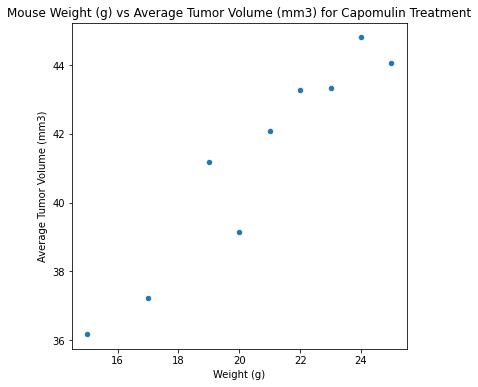

In [865]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Retrieve the data for the Capomulin regime
mouse_weight_volume = mouse_full_clean.loc[mouse_full_clean["Drug Regimen"] == "Capomulin", ["Mouse ID", "Weight (g)", "Timepoint", "Tumor Volume (mm3)"]]

# Use the groupby function to group the mice be their weights and calculate the average tumour volume
# for all the mice of these weights
# Weights do not change over time in the data so these can be grouped by
average_tumor_volume = mouse_weight_volume.groupby(["Weight (g)"], sort=True)["Tumor Volume (mm3)"].mean()

# Reset the index for the DataFrame of mouse weight and mean tumour volume
weights_vs_average_volumes = mean_tumor_volume.reset_index()

# Rename the column Tumor Volume (mm3) to Average Tumor Volume (mm3) to more accurately reflect data
weights_vs_average_volumes_final = weights_vs_average_volumes.rename(columns = {"Tumor Volume (mm3)" : "Average Tumor Volume (mm3)"})

# Plot a scatter plot of mouse weight versus average tumour volume
# x-values are the mouse weight and y-values the average tumour volume
# Set the size and title of the plot
ax1 = weights_vs_average_volumes_final.plot(x="Weight (g)", y="Average Tumor Volume (mm3)", kind="scatter", figsize=(6,6), title="Mouse Weight (g) vs Average Tumor Volume (mm3) for Capomulin Treatment")

# Display table of mouse weights and average tumour volume
weights_vs_average_volumes_final


## Correlation and Regression

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.95

The r-squared value is: 0.9034966277438604

The linear regression model is: y = 0.89x + 22.76 (where x is mouse weight and y is the predicted average tumor volume)

rvalue = 0.950524396185527
pvalue = 8.449451040646223e-05
stderr = 0.1105278286274132


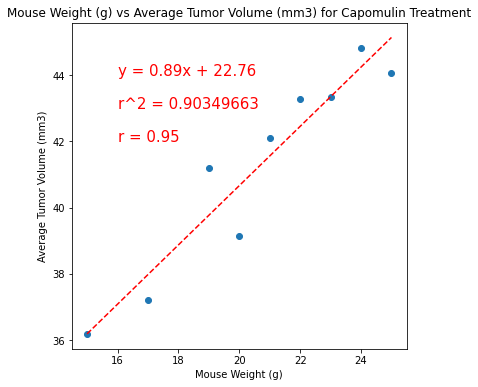

In [866]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen

# Create subfigure for plotting with a suitable size
fig2, ax2 = plt.subplots(figsize=(6,6))

# Retrieve the mouse weights from the previously created DataFrame
mouse_weight = weights_vs_average_volumes_final.iloc[:,0]

#  Retrieve the average tumour volume from the previously created DataFrame
avg_tumor_volume = weights_vs_mean_volumes_final.iloc[:,1]

# Plot the scatter plot of mouse weight versus average tumour volume
# Replotting this to show overlay of regression model
plt.scatter(mouse_weight,avg_tumor_volume)

# Calculate the correlation coefficient between the two variables
correlation_coefficient = st.pearsonr(mouse_weight, avg_tumor_volume)

# Display correlation coefficient rounded to two decimal places
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation_coefficient[0],2)}")

# Dislay the r squared value also to two decimal places
print(f"\nThe r-squared value is: {correlation_coefficient[0]**2}")

# Determine the linear regression model for mouse weight (x-value) and average tumour volume (y-value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor_volume)

# Use the equation to determine the list of y-values from the given x-values so these can also be plotted
regress_values = mouse_weight * slope + intercept

# Create string for expression linear regression equation 
# Round slope and intercept to two decimal places
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Display the equation 
print(f"\nThe linear regression model is: {line_eq} (where x is mouse weight and y is the predicted average tumor volume)\n")

# Display also the calculated rvalue, pvalue and standard error for the linear regression
print(f"rvalue = {rvalue}")
print(f"pvalue = {pvalue}")
print(f"stderr = {stderr}")

# Plot the values determined from the linear regression equation
# Plot in red with double dashes to differentiate from blue dots of scatter plot
plt.plot(mouse_weight,regress_values,"r--")

# Set the title for the plots
ax2.set_title("Mouse Weight (g) vs Average Tumor Volume (mm3) for Capomulin Treatment")

# Set the x-axis label
ax2.set_xlabel("Mouse Weight (g)")

# Set the y-axis label
ax2.set_ylabel("Average Tumor Volume (mm3)")

# Annotate the plot with the linear regression equation, r-squared value and r-value (correlation coefficient)
# Place in empty area of plot with increased font size and in red
plt.annotate(line_eq,(16,44),fontsize=15,color="red")
plt.annotate(f"r^2 = {round((correlation_coefficient[0]**2),8)}",(16,43),fontsize=15,color="red")
plt.annotate(f"r = {round(correlation_coefficient[0],2)}",(16,42),fontsize=15,color="red")

# Display the plots
plt.show()
